# Melbourn House Price Predition Model
- created by :
    - **Student of COEP technological University, PUNE**
        1. 732392024 -- AKSHAY GIDDE


### Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline      
#Magic command -- no need to use plt.show() for every graph


#for ignoring warning.
import warnings
# Ignore specific UserWarning
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

### Read csv data file and storing it in df

In [2]:
df = pd.read_csv('melb_data.csv')

- Let's check the shape of our datasets ( number of rows, number of columns/features )

In [3]:
df.shape

(13580, 21)

# Understanding the data

In [4]:
#returning random 5 rows to get to know the data
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/17,16.7,3150,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/17,6.8,3016,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/17,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/17,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


### Understanding each column
1. Rooms: Number of rooms

2. Price: Price in dollars

3. Method: S - property sold; SP - property sold prior; PI - property passed in; VB - vendor bid; SA - sold after auction.

4. Type: h - house,cottage,villa, semi,terrace; 
         u - unit, duplex; 
         t - townhouse; dev site - development site.

5. SellerG: Real Estate Agent

6. Date: Date sold

7. Distance: Distance from CBD

8. Regionname: General Region (West, North West, North, North east …etc)

9. Propertycount: Number of properties that exist in the suburb.

10. Bedroom2 : Scraped # of Bedrooms (from different source)

11. Bathroom: Number of Bathrooms

12. Car: Number of carspots

13. Landsize: Land Size

14. BuildingArea: Building Size

15. CouncilArea: Governing council for the area

# EDA - Exploratory Data Analysis

- cheecking 1st 5 rows of df

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


- lets check the last 5 rows of df

In [6]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/17,16.7,3150,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/17,6.8,3016,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/17,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/17,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380
13579,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/17,6.3,3013,...,1,1.0,362,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543


- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [7]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3798,Malvern,18 Soudan St,5,h,4240000,S,Marshall,19/11/16,7.4,3144,...,3,3.0,580,320.0,1890.0,Stonnington,-37.86530,145.03040,Southern Metropolitan,4675
1522,Burwood,2 Bennett St,3,h,1342000,S,McGrath,10/12/16,11.7,3125,...,1,2.0,690,NaN,NaN,Whitehorse,-37.85090,145.11700,Southern Metropolitan,5678
13046,Reservoir,25 Ramleh Rd,4,h,920000,S,Ray,19/08/17,12.0,3073,...,2,2.0,743,NaN,NaN,NaN,-37.70848,145.03055,Northern Metropolitan,21650
9950,Maribyrnong,29 Monash St,2,h,920000,VB,Biggin,24/06/17,4.3,3032,...,1,1.0,575,NaN,NaN,Maribyrnong,-37.78446,144.88781,Western Metropolitan,4918
12538,Keilor East,14 Paul Av,3,h,1076500,S,Nelson,09/09/17,11.7,3033,...,1,1.0,638,NaN,NaN,NaN,-37.73951,144.86798,Western Metropolitan,5629
11664,Epping,6 Shields St,3,h,545000,S,hockingstuart,22/07/17,19.6,3076,...,1,2.0,400,NaN,NaN,Whittlesea,-37.62894,145.00977,Northern Metropolitan,10926
2840,Glen Iris,4/15 Rix St,2,u,720000,VB,Jellis,25/02/17,9.2,3146,...,1,2.0,0,74.0,1940.0,Boroondara,-37.84680,145.05150,Southern Metropolitan,10412
8605,Elwood,23 Byron St,3,h,1520000,S,Chisholm,20/05/17,7.7,3184,...,2,1.0,362,138.0,1900.0,Port Phillip,-37.87720,144.99040,Southern Metropolitan,8989
2417,Essendon,1/139 Roberts St,2,u,667000,S,Nelson,17/09/16,8.0,3040,...,1,1.0,206,NaN,NaN,Moonee Valley,-37.74260,144.90000,Western Metropolitan,9264
9284,Preston,145 Murray Rd,3,h,881000,S,Love,03/06/17,8.4,3072,...,1,2.0,470,115.0,1930.0,Darebin,-37.73912,145.01298,Northern Metropolitan,14577


- lets check column wise information of our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### From the above output we can see that :
1. There are 13580 unique rows
2. 21 column/features in the dataset i.e.[0 to 20]
3. Datatypes are of 3 types : object, float, int64
4. There 4 column which are having null values in it.
    - column with null values [ BuildingArea , YearBuilt , CouncilArea , Car ]
5. Memory usage is 2.2+ MB which is negligible and easily handled by machine.

### Handling Null values
- lets check the number of null in each column

In [9]:
df.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

- Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [10]:
# Gives the % of NULL values from the total NULL values down the column
((df.isnull().sum()*100)/df.isnull().count()).sort_values(ascending = False).head(5)

BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
Car              0.456554
Suburb           0.000000
dtype: float64

- Here we can see [ CouncilArea , Car ] are the two columns which have null values percentage below or around 10 % so we can fill those values using statistical methods. Like mean, mode, median

- Here we can see [ BuildingArea, YearBuilt ] are the two colums where the NULL value percentage is very high which means close to half of the data is null. So, filling this makes no sense and it will also divert the model AND it will make wrong feeding to the model.
- So, we will drop thosee 2 columns with high percentage of NULL values.

In [11]:
# dropping  [ BuildingArea, YearBuilt ] columns
df.drop(columns = ['BuildingArea','YearBuilt',],inplace = True)

**filling car column with the median of the car values**
- Here mode = median != mean
- mean is prone to outliers so we are filling medain

In [12]:
#Filling car null with median
df['Car'].fillna(df['Car'].median(),inplace = True)

In [13]:
# Filling CouncilArea's NULL with its mode (most frequent value)
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0],inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  CouncilArea    13580 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

Null values has been taken care of!!!!

## Checking the distribution of target data ('Price')

<Axes: xlabel='Price', ylabel='Count'>

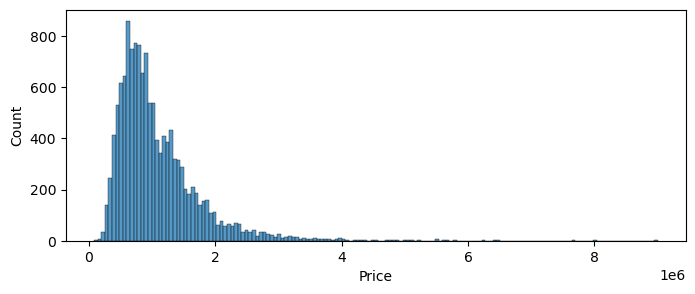

In [15]:
#plotting a distribution graph of a 'Price'
plt.figure(figsize = (8,3))
sns.histplot(df['Price'])

- here we clearly can see the data is not normally distributed
- Bell curve is clearly skewed towards right hand side
- **it means there are outliers in upper range i.e (4th quartile)**
- We have to take care of this

## Handling Ouliers
- taking our target data price and will handle outliers on the basis of 'Price'
- There are sevral methods of Outlier Handling Like:
    1. Z-Score method
    2. IQR method (Interquartile range)
    3. Percentile method

#### Making suitable plot to identify outliers in price

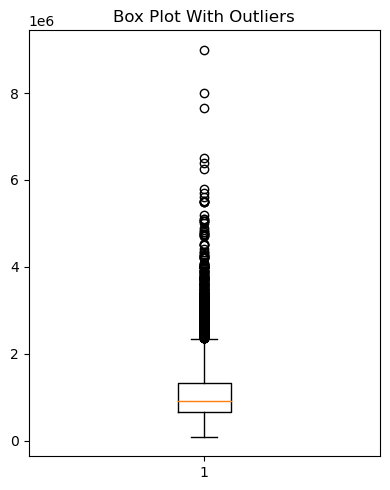

In [16]:
plt.figure(figsize=(4,5))
plt.boxplot(df['Price'])
plt.title('Box Plot With Outliers')
plt.tight_layout()

- So, after ploting the boxplot for the Price column, we can see that there are some outliers present in the price column and from this we can assume that, there are outliers beyond value ~~~ 2.2

### 1. Z-Score Method

- so to handle the outlier and get the exact value level of lower and upper limit of the price we will use Z-scoe technique (method)
- We will take values upto 3 standard deviation from mean on either side to get upper and lower limit
    - For lower_limit add 3 std.dev. in the mean
    - For lower_limit less 3 std.dev. from mean

In [17]:
print('Price mean =',round(df['Price'].mean(),2))
print('Standard dev =',round(df['Price'].std(),2),'\n')

upper_limit = df['Price'].mean() + 3 * df['Price'].std()
lower_limit = df['Price'].mean() - 3 * df['Price'].std()


print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}\n')

#Lets Find outliers based on upper and lower limits 
print('total number of outliers =', len(df[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]),)

# dropping the assigned ouliers
df.drop(index=df[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)].index,inplace = True)

print(f'Data rows without outlier = {len(df)}\n')


Price mean = 1075684.08
Standard dev = 639310.72 

upper limit: 2993616.252343139
lower limit: -842248.0934329773

total number of outliers = 232
Data rows without outlier = 13348



### 2. Inter Quartile Range Method

In [18]:
# #calculate q1 and q2
# q1 = df['Price'].quantile(0.25)
# q3 = df['Price'].quantile(0.75)

# #calculate iter quartile range
# iqr = q3-q1

# #calculating upper and lower limit
# upper_limit = ul = q3 + (1.5 * iqr)
# lower_limit = ll = q1 - (1.5 * iqr)


# print(f'Upper Limit : {ul}\nLower Limit : {ll}')

# #creating the index and dropping those rows which are outlier
# df.drop(index = df[df['Price']>= ul].index, inplace = True )
# df.drop(index = df[df['Price']<= ll].index, inplace = True )
 
# #printing the length of new df
# print('Rows count after Dropping Outliers :',len(df))

- **Plotting the boxplot again to see the inprovement ouliers**

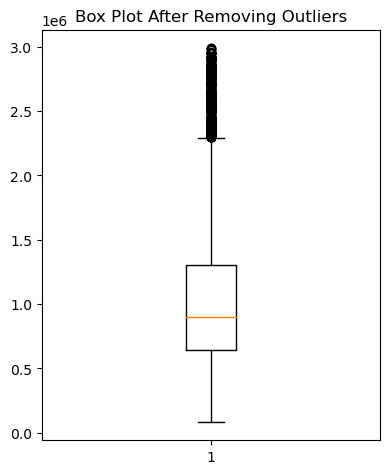

In [19]:
plt.figure(figsize = (4,5))
plt.boxplot(df['Price'])
plt.title('Box Plot After Removing Outliers')
plt.tight_layout()

### Distribution after oulier handling
- its somewhat normal now so we can proceed

<Axes: xlabel='Price', ylabel='Count'>

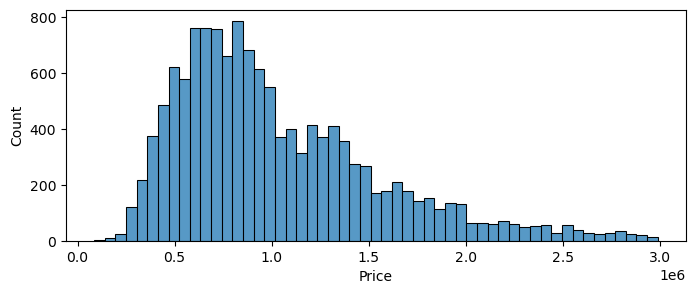

In [20]:
plt.figure(figsize=(8,3))
sns.histplot(df['Price'])

#### Outliers has been taken care of

### Make categoriacal and numeric features (separate)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13348 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13348 non-null  object 
 1   Address        13348 non-null  object 
 2   Rooms          13348 non-null  int64  
 3   Type           13348 non-null  object 
 4   Price          13348 non-null  int64  
 5   Method         13348 non-null  object 
 6   SellerG        13348 non-null  object 
 7   Date           13348 non-null  object 
 8   Distance       13348 non-null  float64
 9   Postcode       13348 non-null  int64  
 10  Bedroom2       13348 non-null  int64  
 11  Bathroom       13348 non-null  int64  
 12  Car            13348 non-null  float64
 13  Landsize       13348 non-null  int64  
 14  CouncilArea    13348 non-null  object 
 15  Lattitude      13348 non-null  float64
 16  Longtitude     13348 non-null  float64
 17  Regionname     13348 non-null  object 
 18  Propertycou

In [22]:
categorical_features = df.select_dtypes('object')
numeric_features = df.select_dtypes(include = ('int64','float64'))

- Check the unique features in each of the categorical columns

In [23]:
for col in categorical_features:
    print(f'Unique values in {col} = {len(df[col].unique())}')

Unique values in Suburb = 314
Unique values in Address = 13151
Unique values in Type = 3
Unique values in Method = 5
Unique values in SellerG = 267
Unique values in Date = 58
Unique values in CouncilArea = 33
Unique values in Regionname = 8


- Each unique feature will become its own feature in the dataset, resulting in a high-dimensional feature space.
- This can make the model more complex and computationally intensive, especially if the address feature has a large number of unique values.
-  to higher number of unique values(close to 99%)in 'Address' column it will heavly impact the complexity of the overall model.
- so we have to delete such columns. (like Address, Suburb, SellerG)

In [24]:
categorical_features.drop(columns = ['Suburb','Address','SellerG','Date'],inplace = True)

- Checking the columunar uniqueness again:

In [25]:
for col in categorical_features:
    print(f'Unique values in {col} = {len(df[col].unique())}')
    

Unique values in Type = 3
Unique values in Method = 5
Unique values in CouncilArea = 33
Unique values in Regionname = 8


### Feature Modification
- **Here, We need to convert categorical values to numerical values**
- For that we use pandas inbuilt **.get_dummies** fucntion.
- **.get_dummies** do kind of one hot encoding which makes a new column for each unique feature and assign binnary to it


In [26]:
#take a look at categorical features
categorical_features

,Type,Method,CouncilArea,Regionname
0,h,S,Yarra,Northern Metropolitan
1,h,S,Yarra,Northern Metropolitan
2,h,SP,Yarra,Northern Metropolitan
3,h,PI,Yarra,Northern Metropolitan
4,h,VB,Yarra,Northern Metropolitan
...,...,...,...,...
13575,h,S,Moreland,South-Eastern Metropolitan
13576,h,SP,Moreland,Western Metropolitan
13577,h,S,Moreland,Western Metropolitan
13578,h,PI,Moreland,Western Metropolitan


- Encoding the actual data by using get dummies which is pandas default encoder
- creating new encoded data columns attaching those new columns to df and dropping original once

In [27]:
categorical_features = categorical_features.join(pd.get_dummies(categorical_features)).drop(columns = categorical_features)

In [28]:
categorical_features.shape

(13348, 49)

In [29]:
numeric_features.shape

(13348, 11)

In [30]:
categorical_features

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule,CouncilArea_Bayside,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
13576,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13577,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13578,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [31]:
numeric_features

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000,2.5,3067,2,1,1.0,202,-37.79960,144.99840,4019
1,2,1035000,2.5,3067,2,1,0.0,156,-37.80790,144.99340,4019
2,3,1465000,2.5,3067,3,2,0.0,134,-37.80930,144.99440,4019
3,3,850000,2.5,3067,3,2,1.0,94,-37.79690,144.99690,4019
4,4,1600000,2.5,3067,3,1,2.0,120,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000,16.7,3150,4,2,2.0,652,-37.90562,145.16761,7392
13576,3,1031000,6.8,3016,3,2,2.0,333,-37.85927,144.87904,6380
13577,3,1170000,6.8,3016,3,2,4.0,436,-37.85274,144.88738,6380
13578,4,2500000,6.8,3016,4,1,5.0,866,-37.85908,144.89299,6380


#### Joining categorical_featues and numeric_features and storing them in one data (dataframe)

In [32]:
data = categorical_features.join(numeric_features)

### Splitting data into training and target variables

- creating a list which has heading of each of the columns 

In [33]:
features = list(data)

In [34]:
features.remove('Price')

- 'Price' is our target variable so, removing it from the list of features so that list of features can go to x whcih is training features

In [35]:
training_features = x = data[features]

In [36]:
target_features = y = data['Price']

### Splitting data into Train Test Split

In [37]:
# importing train test split
from sklearn.model_selection import train_test_split

**Splites the main data**

- split data into training and validation data, for both features and target. 
- The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split even run this script.
- split test size will be of test = 25%

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.15,random_state=4)

In [39]:
print("Total size: ", x.shape)
print("Train size: ", Xtrain.shape, Ytrain.shape)
print("Test size: ", Xtest.shape, Ytest.shape)

Total size:  (13348, 59)
Train size:  (11345, 59) (11345,)
Test size:  (2003, 59) (2003,)


### Model Building
- As per the guidline of the project we will use SVR
- Although SVR is a classification based regressor

In [40]:
#importing the SVR
from sklearn.svm import SVR

In [41]:
# SVR model is storing in model variable
model = SVR()

In [42]:
# it will make sure each columns will have names assigned
model.feature_names_in_ = features

In [43]:
# Fit/Feed the train data to the model
model.fit(Xtrain,Ytrain)

SVR()

- To generates predictions for the test data based on the trained model, which are stored in the Ypred variable.

In [44]:
Ypred = model.predict(Xtest)

### Accuracy testing
- this is a prediction algorithm so confusion matrix can't be used.
- so we will be using mean absolute error and R^2 error to evalute our model.


In [45]:
# Importing necessory library for testing 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
# mean squared error
mae = mean_absolute_error(Ytest,Ypred)
print(f'mean absolute error = {mae}\n')


# R^2 score
r2 = r2_score(Ytest, Ypred)
print("R^2 Score:", r2)

mean absolute error = 411047.30953821767

R^2 Score: -0.08673428124577898


### **SVR is failing in this type of algorithm so we will use another regressor algorithms to predict the house prices** 

## 1. Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# #to get the best random state for model
# best_score = float('inf')  # Initialize with a high value
# best_random_state = None


# for random_state in range(100):  # Try different random states
#     model = DecisionTreeRegressor(random_state=random_state)
#     model.fit(Xtrain, Ytrain)
#     Ypred = model.predict(Xtest)
#     score = mean_absolute_error(Ytest, Ypred)  # Evaluate using mean squared error
#     if score < best_score:
#         best_score = score
#         best_random_state = random_state

# print("Best Random State:", best_random_state)
# print("Best Mean Squared Error:", best_score)

In [49]:
dtm = DecisionTreeRegressor()

In [50]:
dtm.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [51]:
dtm_Ypred = dtm.predict(Xtest)

In [52]:
# mean squared error
mae = mean_absolute_error(Ytest,dtm_Ypred)
print(f'mean absolute error = {mae}\n')


# R^2 score
r2 = r2_score(Ytest, dtm_Ypred)
print('Accuracy = R^2 = ',round(r2*100,2),'%')

mean absolute error = 205358.96255616576

Accuracy = R^2 =  67.83 %



## 2. Linear Regression Model

In [53]:
 from sklearn.linear_model import LinearRegression

In [54]:
lrm = LinearRegression()

In [55]:
lrm.fit(Xtrain,Ytrain)

LinearRegression()

In [56]:
lrm_Ypred = lrm.predict(Xtest)

In [57]:
# mean squared error
mae = mean_absolute_error(Ytest,lrm_Ypred)
print(f'mean absolute error = {mae}\n')


# R^2 score
r2 = r2_score(Ytest, lrm_Ypred)
print('Accuracy = R^2 = ',round(r2*100,2),'%')

mean absolute error = 223098.24140755372

Accuracy = R^2 =  68.11 %


## 3. Rigid Regression

In [58]:
from sklearn.linear_model import Ridge

In [59]:
rr = Ridge()

In [60]:
rr.fit(Xtrain, Ytrain)

Ridge()

In [61]:
rr_Ypred = rr.predict(Xtest)

In [62]:
# mean squared error
mae = mean_absolute_error(Ytest,rr_Ypred)
print(f'mean absolute error = {mae}\n')


# R^2 score
r2 = r2_score(Ytest,rr_Ypred)
print('Accuracy = R^2 = ',round(r2*100,2),'%')

mean absolute error = 222983.63655218072

Accuracy = R^2 =  68.13 %


- **From above observation we can see that all other algoriths are working fine and showing significat accuracy which is close to 70%**
- **here we can say SVR is not a best fit for this data prediction**

### Hist - Gradient Boosting Regressor
- **Hist - Gradient Boosting Regressor will be the best for this problem lets check accuracy by using this.**

In [63]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [64]:
hgbr = HistGradientBoostingRegressor()

In [65]:
hgbr.fit(Xtrain,Ytrain)

HistGradientBoostingRegressor()

In [66]:
hgbr_Ypred = hgbr.predict(Xtest)

In [67]:
# mean squared error
mae = mean_absolute_error(Ytest,hgbr_Ypred)
print(f'mean absolute error = {mae}\n')


# R^2 score
r2 = r2_score(Ytest,hgbr_Ypred)
print('Accuracy = R^2 = ',round(r2*100,2),'%')

mean absolute error = 147162.54183081223

Accuracy = R^2 =  84.06 %


# Thanks